In [1]:
import numpy as np
import torch
import iris
import matplotlib.pyplot as plt
from pytorch_neural import nn_decision_tree  # assuming this is adapted for PyTorch as shown earlier
%matplotlib inline

In [2]:
# Set random seeds for reproducibility
np.random.seed(1943)
torch.manual_seed(1943)

In [3]:
# Load data
x = iris.feature[:, 2:4]  # use "Petal length" and "Petal width" only
y = iris.label
d = x.shape[1]
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3


In [4]:
# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [6]:
# Initialize variables
cut_points_list = [torch.nn.Parameter(torch.rand(i)) for i in num_cut]
leaf_score = torch.nn.Parameter(torch.rand(num_leaf, num_class))

# Define loss and optimizer
optimizer = torch.optim.Adam([*cut_points_list, leaf_score], lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
loss_function = torch.nn.CrossEntropyLoss()

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [8]:
clf.predict(x)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(x))

0.9933333333333333

In [15]:
sample_x0 = np.repeat(np.linspace(0, np.max(x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_x_tensor = torch.tensor(sample_x, dtype=torch.float32)

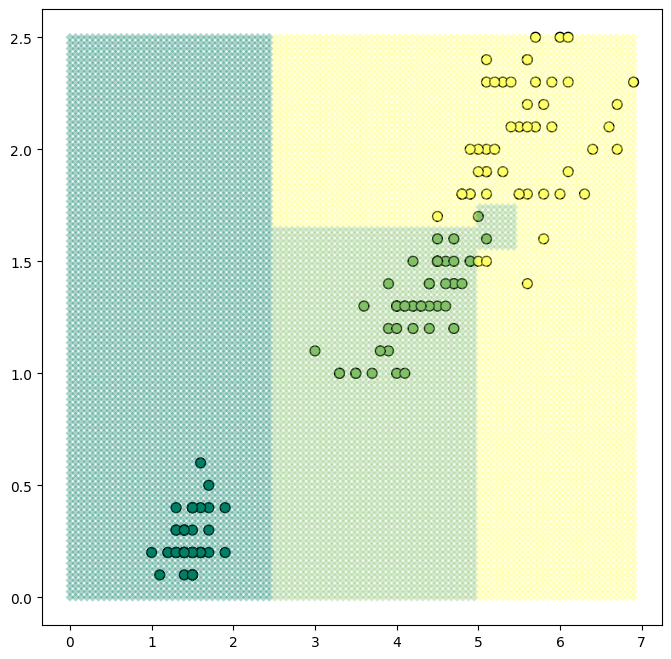

In [28]:
import numpy

sample_label = clf.predict(sample_x_tensor)
sample_label = torch.tensor(sample_label, dtype=torch.float32).argmax(1)

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c=np.argmax(y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.numpy().flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
plt.show()

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()

X = iris.data[:, 2:4]
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 100.00%


In [31]:
import torch
sample_x0 = np.repeat(np.linspace(0, np.max(X[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(X[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_x_tensor = torch.tensor(sample_x, dtype=torch.float32)

tensor([0., 0., 0.,  ..., 2., 2., 2.])


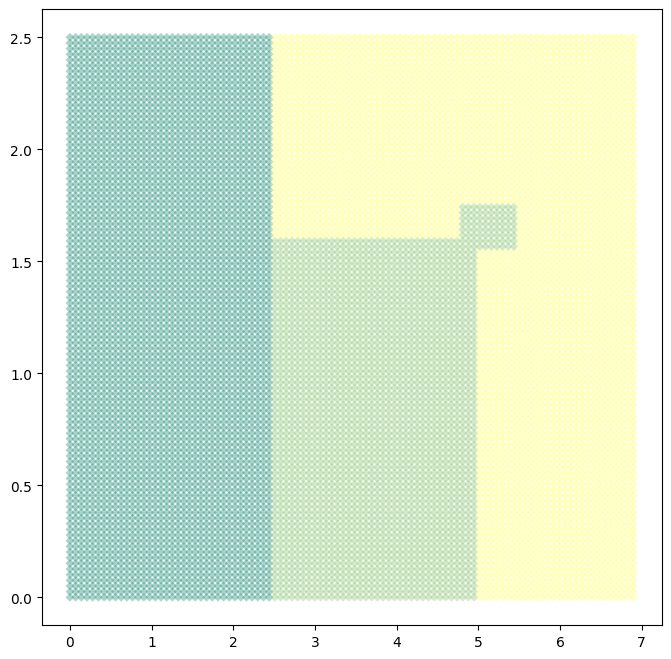

In [34]:
import numpy

sample_label = clf.predict(sample_x_tensor)
sample_label = torch.tensor(sample_label, dtype=torch.float32)#.argmax(1)
print(sample_label)


plt.figure(figsize=(8,8))
#plt.scatter(X[:,0], X[:,1], c=np.argmax(y, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.numpy().flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
plt.show()